<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 9</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

<p>**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)</p>

<p>**Abgabe**: Montag, 20. Juni, 2016 vor der Vorlesung</p>

<p>**Name**: <font color="red">Bitte geben Sie ihren Namen an</font></p>

<p>**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font></p><br />

<table style="border-style: none; width: 100%; margin-top: 20px; padding: 0px;"
><tr style="border-style: none; margin: 0px; padding: 0px;">
<td style="border-style: none; width: 80%; margin: 0px; padding: 0px; font-size: 20px; font-weight: bold">Der heiße Draht 2.0</td>
<td style="border-style: none; width: 20%; margin: 0px; padding: 0px; text-align: right">(5 Punkte)</td></tr></table>



Auf einem der vorherigen Übungsblatter haben Sie die **Wärmeleitungsgleichung** als Anfangswertproblem mit der Euler-Methode bearbeitet. Dabei mussten Sie feststellen, dass die Stabilität des Algorithmus stark von der Diskretisierung $dx$ in der räumlichen und $dt$ in der zeitlichen Dimension abhing. 

Diese Einschränkung wird durch das **Crank-Nicolson-Verfahren** aufgehoben. Wir wollen dies in dieser Aufgabe überprüfen. Die Iterationsschritte des Algorithmus haben Sie in der Vorlesung ausführlich besprochen. Implementieren Sie das Crank-Nicolson-Verfahren für die eindimensionale **Warmeleitungsgleichung**

\begin{equation}\dfrac{\partial u}{\partial t} = \kappa\dfrac{\partial^2}{dx^2} \end{equation}

mit Anfangsverteilung bei $t=0$

\begin{equation} 
u(x, 0) = \sin(\pi x),\quad x \in (0, 1)
\end{equation}

und untersuchen Sie die Stabilität indem Sie $20, 200,$ und  $2000$ räumliche Diskretisierungsschritte verwenden.

In [1]:
k = 1 # factor κ
N = 2000 # number of time steps
u(x) = sinpi(x) # initial density
;

In [2]:
function crank_nickelson_matrix(c, n)
    diagonal   = Diagonal(ones(n))
    side_diags = ones(n, n) - diagonal
    side_diags -= triu(ones(n, n), 2) + transpose(triu(ones(n, n), 2))
    
    A = (1+2*c)*diagonal - c*side_diags
    B = (1-2*c)*diagonal + c*side_diags

    return inv(A)*B
end

crank_nickelson_matrix (generic function with 1 method)

In [3]:
using PyPlot

function crank_nickelson(k, nt, nx)
    # set constants
    dx = 1/(nx-1)
    dt = 1/(nt-1)
    c = k/2*dt/dx^2 # factor for matrix
    A = crank_nickelson_matrix(c, nx)

    # initialize starting values
    T_0 = []
    for x in 0:dx:1
        push!(T_0, u(x))
    end
    
    # time development
    T = copy(T_0)
    for i in 1:N
        T = A*T
    end
    
    # plot
    xs = collect(linspace(0, 1, nx))
    
    figure()
    title("Temperaturverteilung mit nx=$nx und nt=$nt")
    xlabel(L"Ort $x$")
    ylabel(L"Temperatur $T$")
    # plot(xs, T_0, label=L"T_0") # start values
    plot(xs, T, label=L"T")   # end values
    legend()

    return
end

crank_nickelson (generic function with 1 method)

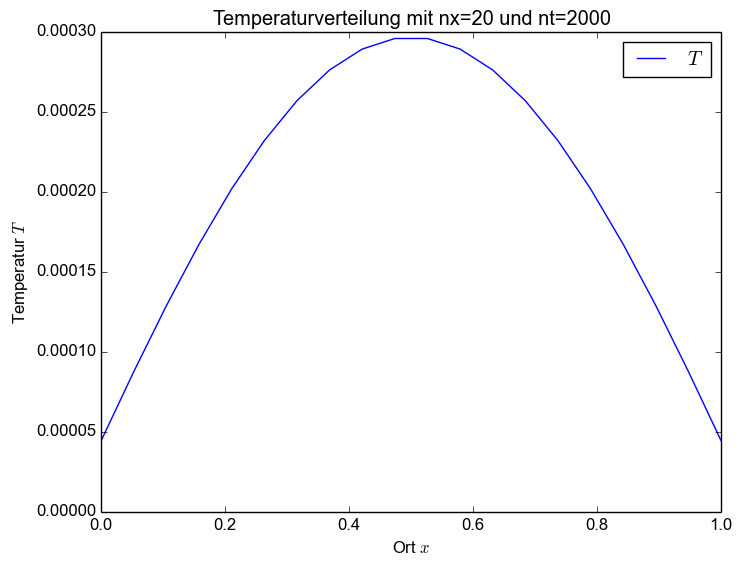

In [4]:
crank_nickelson(k, N, 20)

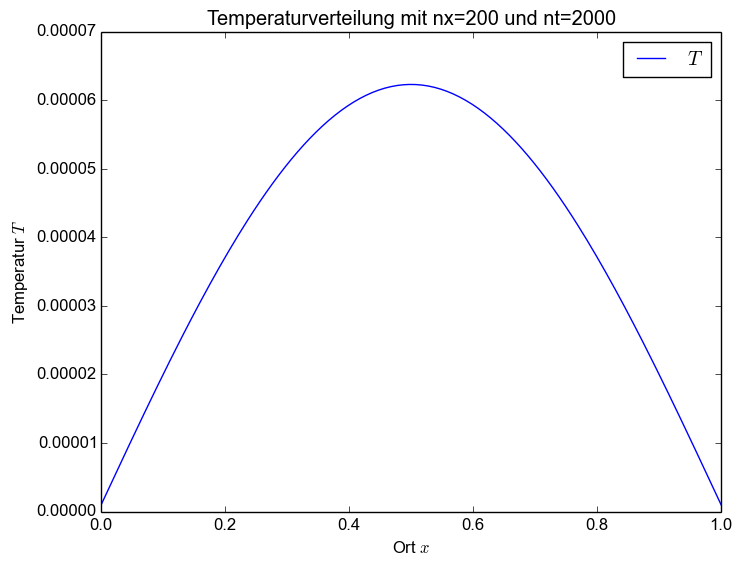

In [5]:
crank_nickelson(k, N, 200)

In [ ]:
crank_nickelson(k, N, 2000)

Die Berechnungszeit nimmt - bei konstanter Zeitdiskretisierung - mit dem Verfeinern der räumlichen Diskretisierung stark zu, in etwa quatratisch.

Zwischen den ersten beiden Ergebnissen ($n_x = 20$ und $n_x = 200$) gibt es nur einen geringen Unterschied: Der Graph wird glatter und die Temperatur am Rand ist bei $n_x = 200$ geringer als bei dem geringeren $n_x$, dies ist am zweiten Graphen zu sehen. Ebenso ist hier die maximale Temperatur (in der Mitte) deutlich geringer als bei dem ersten Graphen.

Beim dritten Graphen ist es deutlich anders: Die Maximaltemperatur in der Mitte ist wieder geringer etwas geringer.  
Allerdings ist hierbei am Ende des *Crank-Nickelson-Verfahrens* selbriges instabil geworden. Dies sieht man daran, dass ganz rechts die Temperaturkurve stark schwankt, da ein blauer Strich am rechten Rand zu sehen ist.